# Read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold

df = pd.read_csv(r"cul_cat1.csv",index_col=[0])

# choose data

In [2]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cd=df[col]
scaler = StandardScaler()
scale = scaler.fit_transform(cd)
cd_scale = pd.DataFrame(scale, columns = col)

# PCA(principal component analysis)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct=pca.fit_transform(cd_scale.values)
pca_cf = pd.DataFrame(data = pct, columns = ['x','y'])
pca_cf['repeater']=df['repeater_name']

/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_2278/1202063239.py:15: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f85289a3400> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(['_','non-repeater','repeater'],fontsize=fs-2,loc='best')


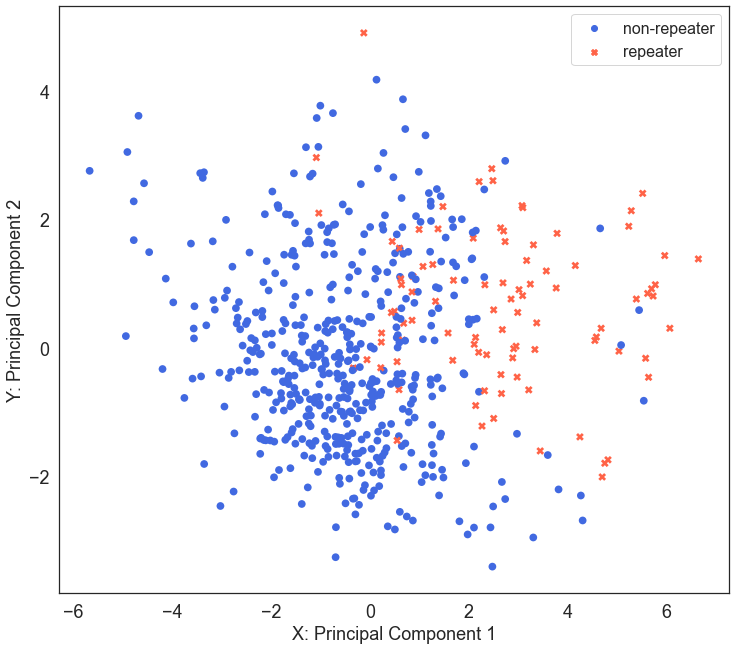

In [5]:
p=12
fs=18
s=5*p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
""" fig,ax=plt.subplots()
scat=ax.scatter(pca_cf['x'].values,pca_cf['y'].values,
            #c=[sns.color_palette()[x] for x in df.repeater_name.map({"non-repeater":0, "repeater":1})],
            #s=[y for y in df.repeater_name.map({"non-repeater":10, "repeater":100})],
            c=(df['repeater_name']=='repeater'),
            cmap='bwr',
            marker='o'
            ) """
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue='repeater',style='repeater',data=pca_cf,linewidth=0,palette=color,s=s)
plt.legend(['_','non-repeater','repeater'],fontsize=fs-2,loc='best')
#c,d=scat.legend_elements()
#d=['non-repeater','repeater']
#legend=ax.legend(c,d,loc="best",fontsize=fs)
#ax.add_artist(legend)
#plt.title('PCA',fontsize=fs)
plt.xlabel('X: Principal Component 1',fontsize=fs)
plt.ylabel('Y: Principal Component 2',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/PCA.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

For FAST observation

Text(0, 0.5, '')

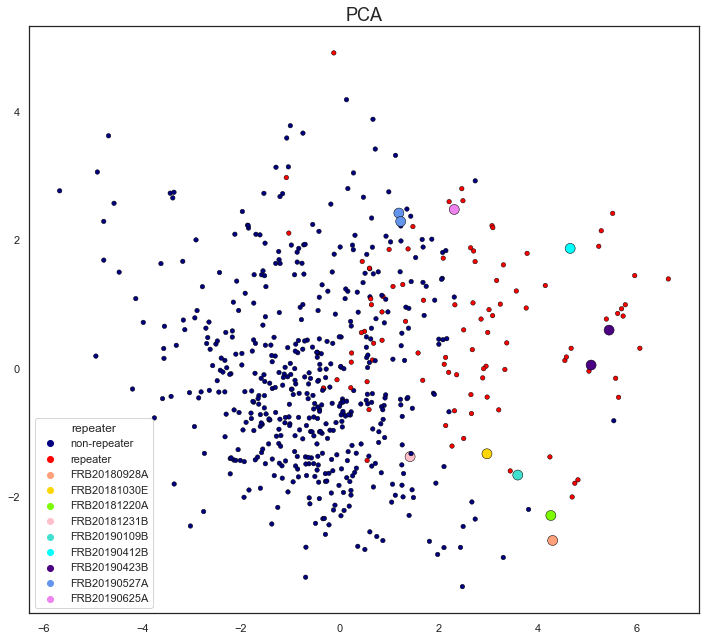

In [6]:
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
obs=pca_cf.copy()
#obs['repeater']=df['repeater_name'].copy()
list=["FRB20180928A","FRB20181030E","FRB20181220A","FRB20190109B","FRB20190412B","FRB20190423B","FRB20190625A","FRB20181231B","FRB20190527A"]
for l in list:
    obs.loc[np.ravel(np.where(df.loc[:,'tns_name']==l)),'repeater']=l
color_obs=['navy','red','lightsalmon','gold','lawngreen','pink','turquoise','aqua','indigo','cornflowerblue','violet']
sns.scatterplot(x='x',y='y',data=obs,hue='repeater',
                palette=color_obs,s=20+80*((obs.loc[:,'repeater']!='repeater')&(obs.loc[:,'repeater']!='non-repeater')),
                edgecolor='black',linewidth=0.5)
plt.title('PCA',fontsize=18)
plt.xlabel(None,fontsize=18)
plt.ylabel(None,fontsize=18)

In [7]:
print(pca.components_)

[[-0.00942375  0.17564036 -0.0477477   0.07838234 -0.38641738 -0.37940487
   0.26921517 -0.42143307 -0.46770732 -0.44557693]
 [ 0.14099794  0.61023925 -0.22417478  0.27206954  0.26620318  0.22156067
   0.45009296  0.28033701  0.14014113 -0.25037205]]


In [8]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.40395752 0.20747851]
0.611436034069726


In [9]:
pcavar=np.sqrt((pca.explained_variance_[0]*pca.components_[0])**2)+np.sqrt((pca.explained_variance_[1]*pca.components_[1])**2)
pca_al=pd.DataFrame()
pca_al['col']=col
pca_al['var1']=np.abs(pca.explained_variance_[0]*pca.components_[0])
pca_al['var2']=np.abs(pca.explained_variance_[1]*pca.components_[1])
pca_al['var']=pcavar

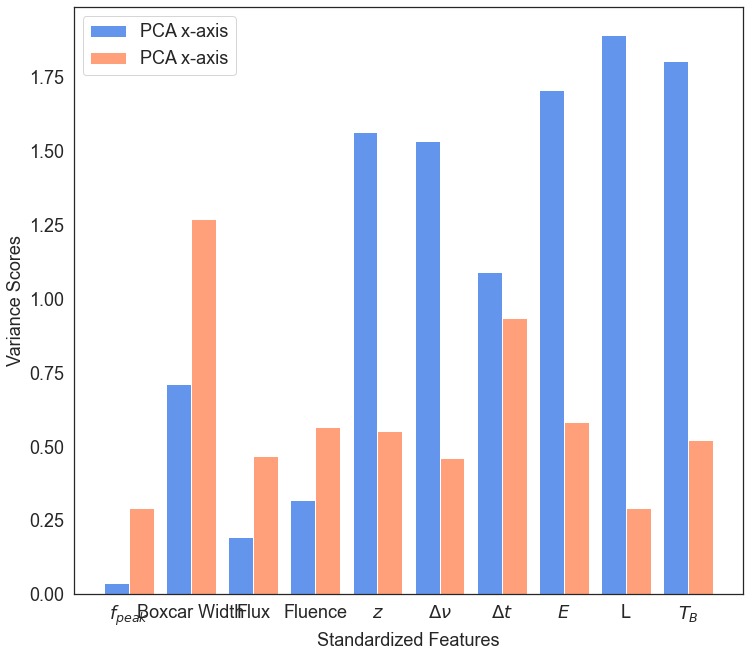

In [10]:
p=12
colx=['$f_{peak}$','Boxcar Width','Flux','Fluence','$z$',r'$\Delta \nu$','$\Delta t$','$E$','L','$T_B$']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(col))
fig,ax=plt.subplots()
rects1=ax.bar(x-width/2,pca_al['var1'],width,label='PCA x-axis',color='cornflowerblue')
rects2=ax.bar(x+width/2,pca_al['var2'],width,label='PCA x-axis',color='lightsalmon')
ax.legend(fontsize=fs)
#ax.set_title('Variances of Features in PCA',fontsize=fs)
ax.set_xlabel('Standardized Features',fontsize=fs)
ax.set_ylabel('Variance Scores',fontsize=fs)
plt.tick_params(labelsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
#legend('Principal Component 1',fontsize=18)
#plt.savefig(f'./fig/PCA_feature.png',bbox_inches='tight',dpi=100,pad_inches=0.5)
plt.show()

# Finding Optimum Value of K

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


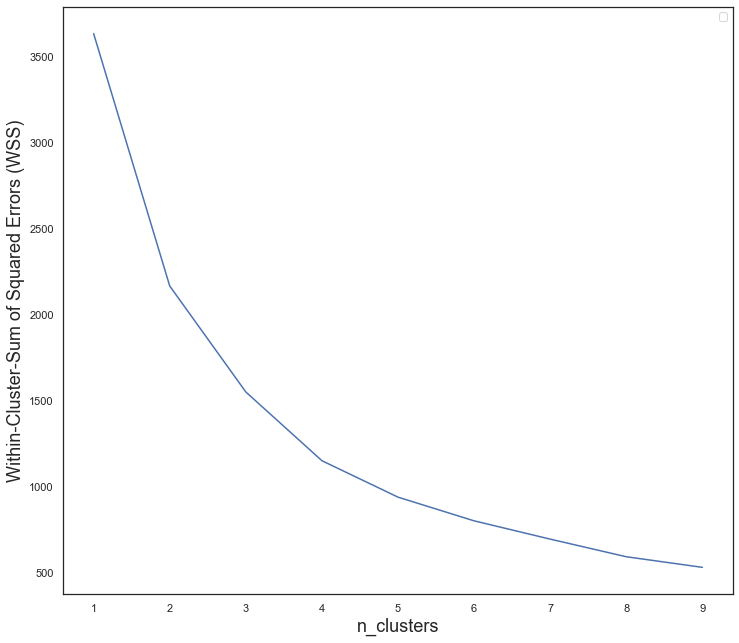

In [11]:
K=range(1,10)
wss = []
wss_pca=[]
for k in K:
    #kmeans=cluster.KMeans(n_clusters=k)
    #kmeans=kmeans.fit(cf_scale.values)
    #wss_iter = kmeans.inertia_
    #wss.append(wss_iter)
    kmeans_pca=cluster.KMeans(n_clusters=k)
    kmeans_pca=kmeans_pca.fit(pca_cf.loc[:,['x','y']])
    wss_iter_pca = kmeans_pca.inertia_
    wss_pca.append(wss_iter_pca)
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
#plt.plot(K,wss,label='Raw data space')
plt.plot(K,wss_pca)
plt.legend()
plt.xlabel('n_clusters',fontsize=18)
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)',fontsize=18)
#plt.savefig(f'./fig/PCA Kmeans WSS.png',bbox_inches='tight',dpi=100,pad_inches=0.5)
plt.show()

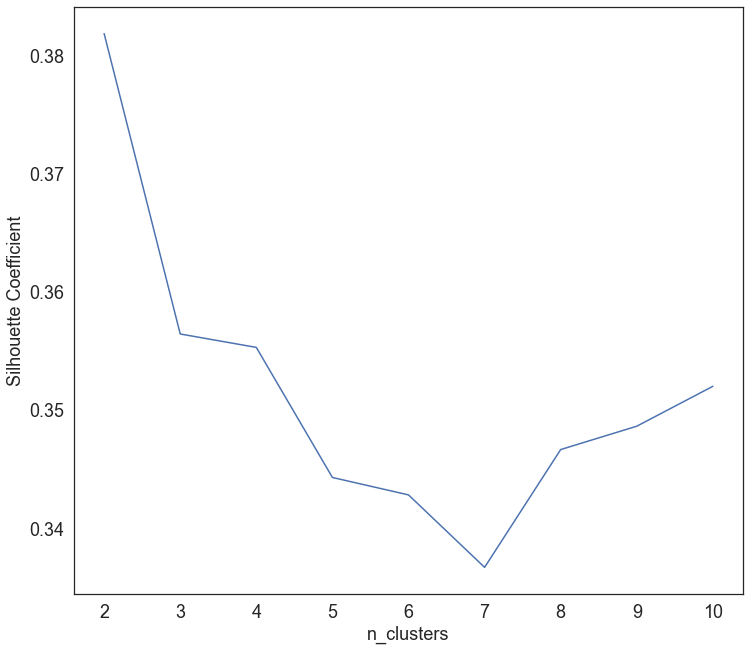

In [12]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
K=range(2,11)
si_pca=[]
si=[]
for i in K:
    si_pca_labels=cluster.KMeans(n_clusters=i).fit(pca_cf[['x','y']]).labels_
    t_pca=metrics.silhouette_score(pca_cf[['x','y']],labels=si_pca_labels)
    si_pca.append(t_pca)

p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
plt.plot(K,si_pca)
#plt.legend(fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlabel('n_clusters',fontsize=fs)
plt.ylabel('Silhouette Coefficient',fontsize=fs)
plt.savefig(f'./fig/PCA_Kmeans_Silhouette_Coefficient.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


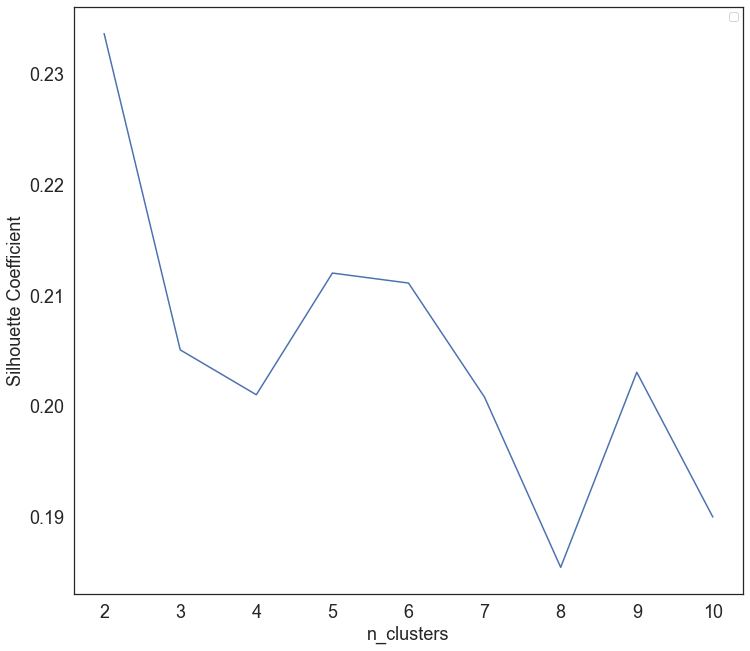

In [13]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
K=range(2,11)
si=[]
for i in K:
    si_labels=cluster.KMeans(n_clusters=i).fit(cd_scale).labels_
    t=metrics.silhouette_score(cd_scale,labels=si_labels)
    si.append(t)

p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
plt.plot(K,si)
plt.legend()
plt.tick_params(labelsize=fs)
plt.xlabel('n_clusters',fontsize=fs)
plt.ylabel('Silhouette Coefficient',fontsize=fs)
#plt.savefig(f'./fig/Kmeans_Silhouette_Coefficient.png',bbox_inches='tight',dpi=100,pad_inches=0.5)
plt.show()

In [14]:
""" from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm   # colormap
import numpy as np
from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
X=pca_cf[['x','y']].values
for n_clusters in [2,3,4,5,6,7]:    
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
               ,marker='o'
               ,s=8 
               ,c=colors
               )
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show() """

' from sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_samples, silhouette_score\nimport matplotlib.pyplot as plt\nimport matplotlib.cm as cm   # colormap\nimport numpy as np\nfrom sklearn.datasets import make_blobs\n#X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)\nX=pca_cf[[\'x\',\'y\']].values\nfor n_clusters in [2,3,4,5,6,7]:    \n    n_clusters = n_clusters\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n    fig.set_size_inches(18, 7)\n    ax1.set_xlim([-0.1, 1])\n    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])\n    clusterer = KMeans(n_clusters=n_clusters).fit(X)\n    cluster_labels = clusterer.labels_\n    silhouette_avg = silhouette_score(X, cluster_labels)\n    print("For n_clusters =", n_clusters,\n          "The average silhouette_score is :", silhouette_avg)\n    sample_silhouette_values = silhouette_samples(X, cluster_labels)\n    y_lower = 10\n    for i in range(n_clusters):\n        ith_cluster_silhouette_values = sample_

# K-means

K-means groups similar data points together into clusters by minimizing the mean distance between geometric points.

In [15]:
def MLlabel(labels,observe=df['repeater_name']):
    maxlb=np.max(labels)
    num=pd.DataFrame(columns=np.arange(0,maxlb+1),index=['rp_num','sum_num','rp_ratio'])
    for i in range(0,maxlb+1):
        n=np.sum((labels==i))
        num.loc['sum_num',i]=n
        r=np.sum((labels==i)&(observe=='repeater'))
        num.loc['rp_num',i]=r
    num.loc['rp_ratio',:]=num.loc['rp_num',:]/num.loc['sum_num',:]
    cf=num.sort_values(by='rp_ratio',axis=1)
    
    new=np.arange(0,maxlb+1)
    old=cf.columns
    new_labels=labels
    for i in range(len(labels)):
        if (labels[i] in new):
            new_labels[i]=new[labels[i]==old]
    cf.columns=new
    
    return new_labels

/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_2278/2722845040.py:9: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f84f0752f70> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(['_','Non-repeater Cluster','Repeater Cluster'],fontsize=fs-2)


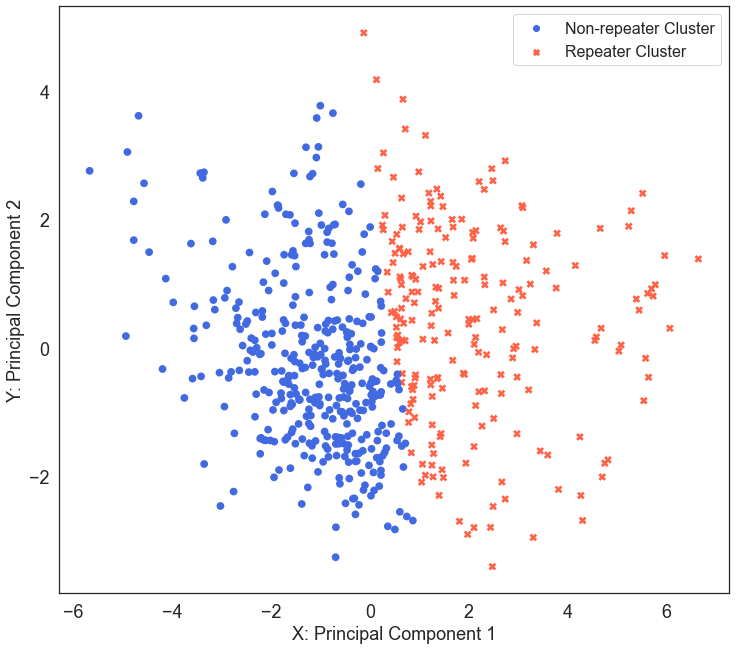

In [16]:
kmeans = KMeans(n_clusters=2,random_state=4)
kmeans = kmeans.fit(pca_cf.loc[:,['x','y']])
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})

pca_cf['k_Clusters'] = MLlabel(kmeans.labels_)
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue = 'k_Clusters',data=pca_cf,linewidth=0,palette=color,style='k_Clusters',s=s)
plt.legend(['_','Non-repeater Cluster','Repeater Cluster'],fontsize=fs-2)
#plt.title('PCA with K-means',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlabel('X: Principal Component 1',fontsize=fs)
plt.ylabel('Y: Principal Component 2',fontsize=fs)
plt.savefig(f'./fig/PCA_Kmeans',bbox_inches='tight',dpi=100,pad_inches=0.1)

In [17]:
""" kmeans_h = KMeans(n_clusters=2,random_state=4)
kmeans_h = kmeans_h.fit(cd_scale.values)
pca_cf['k_Clusters_h'] = MLlabel(kmeans_h.labels_)
sns.scatterplot(x="x", y="y",hue = 'k_Clusters_h',data=pca_cf,palette='viridis') """

' kmeans_h = KMeans(n_clusters=2,random_state=4)\nkmeans_h = kmeans_h.fit(cd_scale.values)\npca_cf[\'k_Clusters_h\'] = MLlabel(kmeans_h.labels_)\nsns.scatterplot(x="x", y="y",hue = \'k_Clusters_h\',data=pca_cf,palette=\'viridis\') '

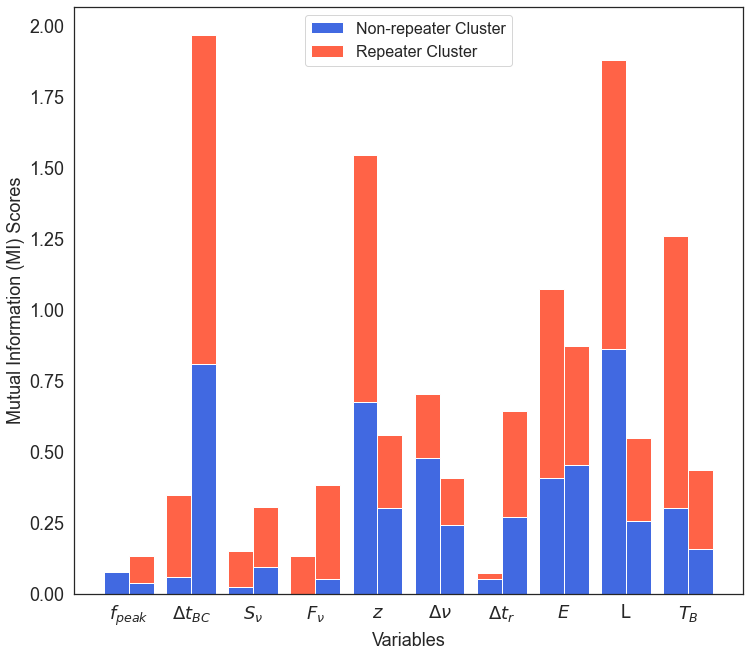

In [18]:
from unml import get_mi_score

p=12
#'fre_width','peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','log_energy', 'log_in_duration','log_luminosity','log_T_B'
colx=[r'$f_{peak}$',r'$\Delta t_{BC}$',r'$S_{\nu} $',r'$F_{\nu} $',r'$z$',r'$\Delta \nu$',r'$\Delta t_r$',r'$E$',r'L',r'$T_B$']
#col=['peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(colx))
fig,ax=plt.subplots()

mi_score1=get_mi_score(cd_scale,label=0,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='x')
rects1=ax.bar(x-width/2,mi_score1['x'],width,label='x',color=color[0])
mi_score2=get_mi_score(cd_scale,label=1,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='x')
rects1=ax.bar(x-width/2,mi_score2['x'],width,label='x',color=color[1],bottom=mi_score1['x'])

mi_score3=get_mi_score(cd_scale,label=0,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='y')
rects3=ax.bar(x+width/2,mi_score3['y'],width,label='y',color=color[0])
mi_score4=get_mi_score(cd_scale,label=1,embedding=pca_cf[['x','y']],labels_list=pca_cf['k_Clusters'],axis='y')
rects4=ax.bar(x+width/2,mi_score4['y'],width,label='y',color=color[1],bottom=mi_score3['y'])

ax.legend(['Non-repeater Cluster','Repeater Cluster'],loc='best',fontsize=fs-2)
ax.set_xlabel('Variables',fontsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores',fontsize=fs)
#ax.set_yscale('log')
plt.tick_params(labelsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
plt.savefig(f'./fig/PCA_feature.png',bbox_inches='tight',dpi=100,pad_inches=0.1)

# all result

In [19]:
frb=pd.concat([df[['tns_name','repeater_name']],pca_cf[['k_Clusters']]],axis=1)
frb.columns=['tns_name','repeater','PCA_K-means']
frb.head()

,tns_name,repeater,PCA_K-means
0,FRB20180725A,non-repeater,0
1,FRB20180727A,non-repeater,0
2,FRB20180729A,non-repeater,1
3,FRB20180729B,non-repeater,0
4,FRB20180730A,non-repeater,0


In [20]:
frb.loc[:,'PCA_K-means']=2*frb['PCA_K-means'].values-1
frb.head()

,tns_name,repeater,PCA_K-means
0,FRB20180725A,non-repeater,-1
1,FRB20180727A,non-repeater,-1
2,FRB20180729A,non-repeater,1
3,FRB20180729B,non-repeater,-1
4,FRB20180730A,non-repeater,-1


In [21]:
""" cs=['PCA_K-means','K-means']
for i in range(len(frb['tns_name'].values)):
    for c in cs:
        if frb.loc[i,c]==0:
            frb.loc[i,c]=-1
        else:
            frb.loc[i,c]=1
frb.head() """

" cs=['PCA_K-means','K-means']\nfor i in range(len(frb['tns_name'].values)):\n    for c in cs:\n        if frb.loc[i,c]==0:\n            frb.loc[i,c]=-1\n        else:\n            frb.loc[i,c]=1\nfrb.head() "

In [22]:
frb.to_csv(r'PCA_result.csv',index=False)